In [2]:
#导入包
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

In [3]:
#导入数据集
iris = load_iris()
data = iris.data
target = iris.target

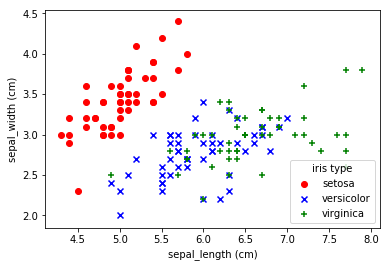

In [4]:
# 鸢尾花数据集可视化
sepal_length_list = data[:, 0]
sepal_width_list = data[:, 1]

setosa_index_list = iris.target == 0
versicolor_index_list = iris.target == 1
virginica_index_list = iris.target == 2

plt.scatter(sepal_length_list[setosa_index_list], 
            sepal_width_list[setosa_index_list], color="red", marker='o', label="setosa")
plt.scatter(sepal_length_list[versicolor_index_list], 
            sepal_width_list[versicolor_index_list], color="blue", marker="x", label="versicolor")
plt.scatter(sepal_length_list[virginica_index_list], 
            sepal_width_list[virginica_index_list],color="green", marker="+", label="virginica")

plt.legend(loc="best", title="iris type")
plt.xlabel("sepal_length (cm)")
plt.ylabel("sepal_width (cm)")

plt.show()

In [5]:
# 计算欧式距离
def euclidDistance(x1, x2, sqrt_flag = True):
    res = np.sum((x1 - x2)**2)
    if sqrt_flag:
        res = np.sqrt(res)
    return res

# 计算距离矩阵
def calEuclidDistanceMatrix(X): 
    X = np.array(X)
    S = np.zeros((len(X), len(X)))
    for i in range(len(X)):
        for j in range(i+1, len(X)): 
            S[i][j] = 1.0 * euclidDistance(X[i], X[j]) 
            S[j][i] = S[i][j] 
    return S

# 邻接矩阵
def myKNN(S, k, sigma = 1):
    N = len(S)
    A = np.zeros((N, N))
    for i in range(N):
        dist_with_index = zip(S[i], range(N))
        dist_with_index = sorted(dist_with_index, key = lambda x:x[0])
        neighbours_id = [dist_with_index[m][1] for m in range(k+1)]
        for j in neighbours_id:
            A[i][j] = np.exp(-S[i][j]/ 2/ sigma/ sigma)
            A[j][i] = A[i][j]
    return A


# 归一化的拉普拉斯矩阵
def calLaplacianMatrix(adjacentMatrix):
    degreeMatrix = np.sum(adjacentMatrix, axis = 1)
    laplacianMatrix = np.diag(degreeMatrix) - adjacentMatrix#
    sqrtDegreeMatrix = np.diag(1.0 / (degreeMatrix ** (0.5)))
    return np.dot(np.dot(sqrtDegreeMatrix, laplacianMatrix), sqrtDegreeMatrix)

In [6]:
# 距离矩阵
S = calEuclidDistanceMatrix(data)

# 邻接矩阵
A = myKNN(S,10)

# 标准化的拉普拉斯矩阵
Laplacian = calLaplacianMatrix(A)

In [7]:
# 计算特征值和特征向量
cra, V = np.linalg.eig(Laplacian)
cras = zip(cra, range(150))
cras = sorted(cras, key=lambda cras:cras[0])
H = np.vstack([V[:,i] for (v, i) in cras[:6]]).T

In [8]:
x = KMeans(n_clusters = 3, n_init = 13, random_state = 11).fit(H)

In [9]:
#计算正确率
count = 0
for i in range(150):
    if target[i] == x.labels_[i]:
        count = count + 1
print('正确率为：'count/ 150)

SyntaxError: invalid syntax (<ipython-input-9-1cdb6f9b0a78>, line 6)

In [10]:
g = nx.Graph()
for i in range(150):
    g.add_node(i)

In [11]:
edgs = []
for i in range(150):
    for j in range(150):
        if(A[i][j] > 0):
            edgs.append((i,j))

In [12]:
colors = []
g.add_edges_from(edgs)
for i in range(150):
    if(target[i] == 0):
        colors.append('blue')
    elif(target[i] == 1):
        colors.append('red')
    else:
        colors.append('green')

C:\Users\zly\Anaconda3\envs\tensorflow\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


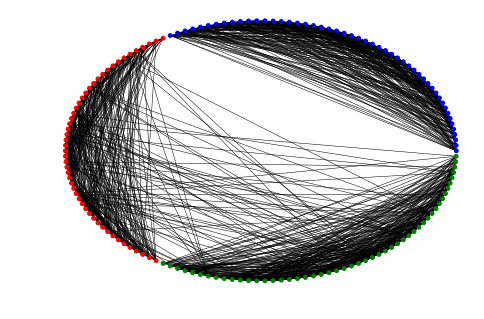

In [13]:
nx.draw(g,pos = nx.circular_layout(g), node_color = colors, node_size = 15, width = 0.5)
plt.show()